In [30]:
import numpy as np
import math
import cv2
from matplotlib import pyplot as mlt
# comment something to push

ok


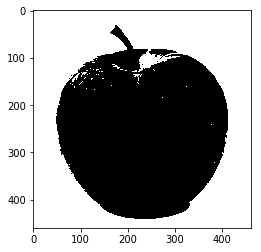

In [62]:
img_path = 'apple.jpg'
image = cv2.imread(img_path,0)
# mlt.imshow(image)
# print(image.shape)
# image = np.reshape(a, (-1, 28)).astype(np.uint8)
boudary = [(0,0),(0,0)]
#[(20,218),(20,218)]
if np.sum(boudary) != 0:
    image = image[boudary[0][0]:boudary[0][1],boudary[1][0]:boudary[1][1]]
# print(image[0,0])
if image[0,0] > 80:
    print('ok')
    ret, img = cv2.threshold(image, 200,255, cv2.THRESH_BINARY_INV)
else:
    ret, img = cv2.threshold(image, 60,255, cv2.THRESH_BINARY)
# image = image[20:218,20:218]
# mlt.imshow(image, cmap='Greys')
mlt.imshow(img, cmap='Greys')

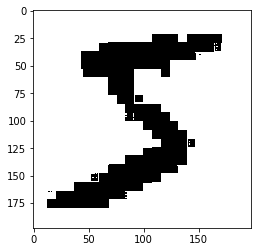

In [36]:
ret,img = cv2.threshold(image,60,255,cv2.THRESH_BINARY)
mlt.imshow(img, cmap = 'Greys')

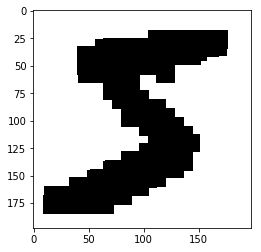

In [67]:
kernel = np.ones((10,10),np.uint8)
temp = cv2.dilate(img, kernel, iterations = 1)
mlt.imshow(temp, cmap = 'Greys')

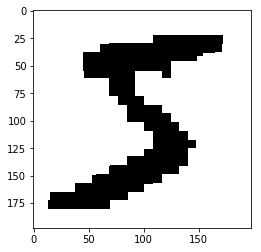

In [69]:
kernel = np.ones((10,10),np.uint8)
# closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
# dilation = cv2.dilate(img,kernel,iterations = 1)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

mlt.imshow(closing,cmap = 'Greys')


In [71]:
img = closing
print((img.shape))

(198, 198)


In [72]:
for i, row in enumerate(img):
    for j, value in enumerate(row):
#         cv2.circle(img,(i,j),5,150,1)
        if value == 255:
            start_point = (i, j)
            print(start_point, value)
            break
    else:
        continue
    break

(23, 109) 255


In [8]:
# cv2.circle(img,start_point[::-1],5,150,2)
# mlt.imshow(img, cmap='Greys')

In [73]:
directions = [ 0,  1,  2,
               7,      3,
               6,  5,  4]
dir2idx = dict(zip(directions, range(len(directions))))
# print(dir2idx)
temp = 1
change_j =   [-temp,  0, temp, # x or columns
              -temp,    temp,
              -temp,  0, temp]

change_i =   [-temp, -temp, -temp, # y or rows
               0,      0,
               temp, temp,temp]

border = []
chain = []
curr_point = start_point
for direction in directions:
#     print(direction)
    idx = dir2idx[direction]
#     print(idx)
    new_point = (start_point[0]+change_i[idx], start_point[1]+change_j[idx])
#     print("New point: {}, {}".format(new_point, img[new_point]))
    if img[new_point] != 0: # if is ROI
        border.append(new_point)
        chain.append(direction)
        curr_point = new_point
        break

count = 0
while(count < 30):
    while curr_point != start_point:
        #figure direction to start search
    #     cv2.circle(img,curr_point[::-1],5,150,2)

        b_direction = (direction + 5) % 8
        b_direction += 1
        dirs_1 = range(b_direction, 8)
        dirs_2 = range(0, b_direction)
        dirs = []
        dirs.extend(dirs_1)
        dirs.extend(dirs_2)
        for direction in dirs:
            idx = dir2idx[direction]
            new_point = (curr_point[0]+change_i[idx], curr_point[1]+change_j[idx])
            if img[new_point] != 0:
                border.append(new_point)
                chain.append(direction)
                curr_point = new_point
                break
        count += 1
    temp+=1

In [74]:
print(count)
print(chain)

843
[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 7, 7, 7, 7, 6, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 1, 1, 1, 1, 1, 1, 0, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 7, 7, 6, 5,

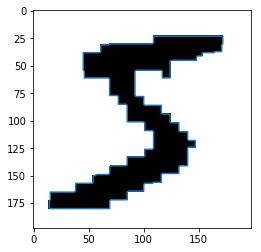

In [75]:
mlt.imshow(img, cmap='Greys')
mlt.plot([i[1] for i in border], [i[0] for i in border])

In [ ]:
my_list=["Alex:1990:London", "Tony:1993:NYC", "Kate:2001:Beijing", "Tony:2001:LA", "Alex:1978:Shanghai"]
dict = {}
for idx, content in enumerate(my_list):
    name = content[:(content.index(':'))]
    if name not in dict:
        dict[name] = []
    dict[name].append(my_list[idx])

In [ ]:
def properNounCorrection(noun):
    noun = noun.lower()
    a = list(noun)
    a[0]= a[0].upper()
    a = ''.join(a)
    print(a)
properNounCorrection('oNAD')

In [22]:
a = [0,1,2,3,4,5,6,7]
b = [0,0,0,0,6,0,6,6,6,6,6,6,6,6,4,4,4,4,4,4,2,4,2,2,2,2,2,0,2,2,0,2]
c = [6,0,0,0,6,2,6,0,0,0,0,0,0,0,6,0,0,0,0,0,6,2,6,0,0,0,0,6,2,0,6,2]
l = len(b)
p = []
def _different(direction, chain_code):
    result = []
    direction = list(range(direction))
    len_code = len(chain_code)
    for i in range(len_code):
        step = [direction.index(chain_code[i]), direction.index(chain_code[i-1])]
        if i ==0:
            step = [direction.index(chain_code[len_code-1]), direction.index(chain_code[0])]
        temp = (direction.index(chain_code[i])-direction.index(chain_code[i-1]))
        if temp < 0:
            minimum = min(step)
            maximum = max(step)
            temp = len(direction[:minimum])+len(direction[maximum:])
        result.append(temp)
    return result
d = _different(8,b)
print(d)

[6, 0, 0, 0, 6, 2, 6, 0, 0, 0, 0, 0, 0, 0, 6, 0, 0, 0, 0, 0, 6, 2, 6, 0, 0, 0, 0, 6, 2, 0, 6, 2]


In [24]:
print((''.join([str(i) for i in b])))
print((''.join([str(i) for i in d])))

00006066666666444444242222202202
60006260000000600000626000062062


In [27]:
temp = [1,2,3]
print([0]+temp)

[0, 1, 2, 3]


In [48]:
from __future__ import print_function, division
import numpy as np
import math
import cv2
from matplotlib import pyplot as mlt

class FreemanChainCode(object):
    def __init__(self, image_path, **kwargs):
        """
        Required arguments:
        - image_path: the location of image, remember '/' with Linux and '\\' with Windows
        Optional arguments:
        - direction: number of direction of chaincode
        Default is 8
        - object_location: list of tuple elements location of object in image
        Default is [(20,218),(20,218)]
        - threshold: choose a threshold for detect object clearly with environment
        Default is 60
        - kernel_size: the size of kernel use for opening and closing to let picture clear, this kernel with have square shape
        Default is 10
        - morno: choose that you will use closing or opening or none
        Default is 'closing'
        """
        self.path = image_path
        self.direction = kwargs.pop('direction', 8)
        self.object_location = kwargs.pop('location', [(20,218),(20,218)])
        self.thresh = kwargs.pop('threshold', 60)
        self.kernel_size = kwargs.pop('kernel_size', 10)
        self.mor = kwargs.pop('morno', 'closing')

    def _preprocessing(self):
        image = cv2.imread(self.path,0)
        boudary = self.object_location
        if np.sum(boudary) != 0:
            image = image[boudary[0][0]:boudary[0][1],boudary[1][0]:boudary[1][1]]
        if image[0,0] > 80:
            ret, img = cv2.threshold(image, self.thresh,255, cv2.THRESH_BINARY_INV)
        else:
            ret, img = cv2.threshold(image, self.thresh,255, cv2.THRESH_BINARY)
        return img
    
    def _start_point(self):
        if self.mor == 'closing':
            img = self._closing()
        if self.mor == 'opening':
            img = self._opening()
        if self.mor == 'None':
            img = self._preprocessing()
        for i, row in enumerate(img):
            for j, value in enumerate(row):
                if value == 255:
                    start_point = (i, j)
                    break
            else:
                continue
            break
        return start_point, img
    def _closing(self):
        kernel = np.ones((self.kernel_size,self.kernel_size),np.uint8)
        img = self._preprocessing()
        closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
        return closing
    def _opening(self):
        kernel = np.ones((self.kernel_size,self.kernel_size),np.uint8)
        img = self._preprocessing()
        opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        return opening
    def _get_chain_code(self):
        '''
        Get chain code by direction
        '''
        start_point, img = self._start_point()
        if self.direction == 4:
            dicrections = [   0,
                           1,    2,
                              3    ]
            num_necess = 3
        elif self.direction == 8:
            directions = [ 0,  1,  2,
                           7,      3,
                           6,  5,  4]
            num_necess = 5
        dir2idx = dict(zip(directions, range(len(directions))))
        move = 1
        # Move the current point follow the direction
        if self.direction == 8:
            # Columns
            change_x =   [-move,  0, move, 
                          -move,     move,
                          -move,  0, move]

            # Rows
            change_y =   [-move,-move,-move,
                           0,             0,
                           move, move, move]
        elif self.direction == 4:
            # Columns
            change_x = [       0,    
                        -move,    move,
                               0       ]
            # Rows
            change_y = [     -move,
                         0,        0,
                              move    ]

        # Border for drawing the boundary when finish the job
        border = []
        chain = []
        curr_point = start_point
        '''
        This find the first shape, the direction we choose to move our chain code
        '''
        for direction in directions:
            idx = dir2idx[direction]
            # Move to each directions to find the true way
            new_point = (start_point[0]+change_y[idx], start_point[1]+change_x[idx])
            if img[new_point] != 0:
                border.append(new_point)
                chain.append(direction)
                curr_point = new_point
                break
        count = 0
        while(count < 30):
            while curr_point != start_point:
                # Make sure the direction always be the first opposite with the current direction
                b_direction = (direction + num_necess) % self.direction
                if self.direction > 4:
                    b_direction += 1
                dirs_1 = range(b_direction, 8)
                dirs_2 = range(0, b_direction)
                dirs = []
                dirs.extend(dirs_1)
                dirs.extend(dirs_2)
                for direction in dirs:
                    idx = dir2idx[direction]
                    new_point = (curr_point[0]+change_y[idx], curr_point[1]+change_x[idx])
                    if img[new_point] != 0:
                        border.append(new_point)
                        chain.append(direction)
                        curr_point = new_point
                        break
                count += 1
            move+=1
        return border, chain, img
    def _different(self):
        '''
        Return the different from chain code
        '''
        directions = self.direction
        _,chain_code,_ = self._get_chain_code()
        result = []
        dir = list(range(directions))
        len_code = len(chain_code)
        for i in range(len_code):
            step = [dir.index(chain_code[i]), dir.index(chain_code[i-1])]
            if i ==0:
                step = [dir.index(chain_code[len_code-1]), dir.index(chain_code[0])]
            temp = (dir.index(chain_code[i])-dir.index(chain_code[i-1]))
            if temp < 0:
                minimum = min(step)
                maximum = max(step)
                temp = len(dir[:minimum])+len(dir[maximum:])
            result.append(temp)
        return result        
    def result(self):
        '''
        This function give the final result, return the boundary point of object
        '''
        border, chain, img = self._get_chain_code()
        diff = self._different()
        shape = [diff[len(diff)-1]] + diff[:(len(diff)-1)]
        chain_code = (''.join([str(i) for i in chain]))
        differ = (''.join([str(i) for i in diff]))
        shape_no = (''.join([str(i) for i in chain_code]))
        return border, chain_code, differ, shape_no, img
    def show(self):
        '''
        Show the final solution
        '''
        #temp
        border, chain_code, differ, shape_no, img = self.result()
        print("Our chain code is {}:".format(chain_code))
        print("Different {}:".format(differ))
        print("Shape number {}:".format(shape_no))
        mlt.imshow(img, cmap='Greys')
        mlt.plot([i[1] for i in border], [i[0] for i in border])


Our chain code is 3344344544544454454454444454444544454544545454454545433333333333333333333333334333333333333333332343333333333333333333333343333333433333434333435554333333343333433334343343434343343434343443434434443444444344444445444444444445444544545445454454544545454545454545545455455455545555455545545555555545555545555555555555555555555555555555555555655655555555555656555555555565655556565555655565565556565565655665556565655656565656565656656565665656665665665666566666566666566666666666666765766666667665555555565656566567667767676777676767777766777767776777767776777777677776777777777767777777777777776770777777777777777777777777770777777777707777770777077770777707770770770770707707070700700700070107100100700007000700000000070107100711077010011007107011110710707001107011077111011007771011011111071101110000710110011110101101011000771110110101111111101111011011111101111111111101110111110111111111010111111111111111111132111112111121112112111211121121121211112111121211211212122212122123

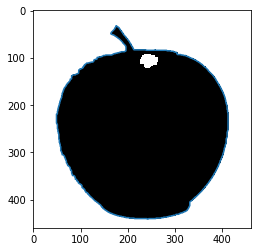

In [64]:


code = FreemanChainCode(image_path = 'apple.jpg',threshold = 200, location = [(0,0),(0,0)], morno = 'closing')
code.show()